In [1]:
import os
from glob import glob

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.__version__

'2.3.0'

In [3]:
data_path = glob('cifar/train/*.png')

In [4]:
len(data_path)

50000

In [5]:
path = data_path[1]
path

'cifar/train\\10000_automobile.png'

In [6]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile ,dtype = tf.float32)
image.shape

TensorShape([32, 32, 3])

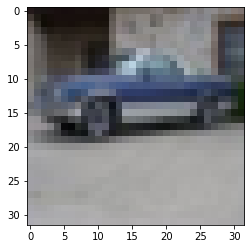

In [7]:
plt.imshow(image)
plt.show()

In [8]:
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile ,dtype = tf.float32)
    return image
    

cifar/train\0_frog.png
cifar/train\10000_automobile.png
cifar/train\10001_frog.png
cifar/train\10002_frog.png


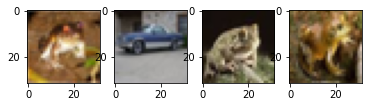

In [9]:
for i in range(4):
    path1 = (data_path[i])
    print(path1)
    plt.subplot(1,4,i+1)
    plt.imshow(read_image(path1))
plt.show()

### Batch

images in list

In [10]:
batch_images = []

In [11]:
for path in data_path[:8]:
    images = read_image(path)
    images = tf.reshape(images, [32,32,3])
    batch_images.append(images)

len(batch_images)

### np array로 묶는법

In [12]:
batch = np.array(batch_images) #이미지 사이즈가 전부 같다는 전제

In [13]:
batch.shape

(8, 32, 32, 3)

### tensor로 묶는법

In [14]:
batch = tf.convert_to_tensor(batch_images)
#이미지 사이즈가 전부 같다는 전제

In [15]:
batch.shape

TensorShape([8, 32, 32, 3])

### Batch size

(batch_size, height, width, channel)

In [24]:
import cv2

In [25]:
def make_batch(batch_paths):
    batch_images = []
    
    for path in batch_paths:
        
        image= read_image(path)
        
        #image = cv2.resize(image, (32,32))
        
        batch_images.append(image)
        
    return tf.convert_to_tensor(batch_images)

In [26]:
batch_images = make_batch(data_path[:8])

In [27]:
batch_images.shape

TensorShape([8, 32, 32, 3])

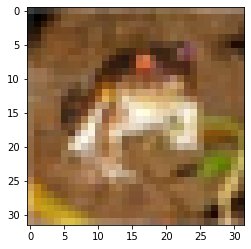

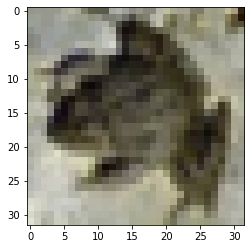

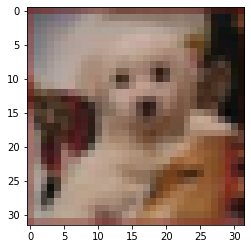

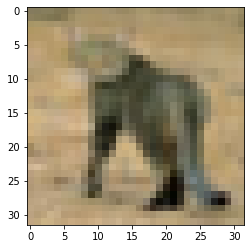

In [28]:
batch_size = 8
for step in range(4):
    batch_images = make_batch(data_path[step*batch_size : batch_size*(step+1)])
    plt.imshow(batch_images[0])
    plt.show()